In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
ethnic_df = pd.read_csv("/content/drive/MyDrive/Representation Discrimination/data/ethnic_dataset_4893_after_removing_rakhain.csv")
ethnic_df

,Unnamed: 0,content
0,0,রমেল হত্যায় মানবাধিকার কমিশনের তদন্ত শুরুরাঙ্গ...
1,1,"নারায়ণগঞ্জের রূপগঞ্জ ও ফতুল্লা, গাজীপুরের কালি..."
2,2,গাইবান্ধার গোবিন্দগঞ্জের রংপুর চিনিকলের সাহেবগ...
3,3,চাঞ্চল্যকর পিলখানা হত্যা মামলায় ডেথ রেফারেন্স ...
4,4,অবাধে মাটি কেটে নেয়ার ধ্বংসের দ্বারপ্রান্তে ধো...
...,...,...
4888,4888,খাগড়াছড়ির দীঘিনালায় জেএসএস (এমএন লারমা) সমর্থি...
4889,4889,শান্তি-সম্প্রীতি স্থাপনে দুই দশক আগে পার্বত্য ...
4890,4890,জনপ্রিয় ম্যাগাজিন অনুষ্ঠান ‘ইত্যাদি’ আজ শুক্রব...
4891,4891,সরকারি বেতন স্কেলের নবম থেকে ১৩তম গ্রেড পর্যন্...


### Removing stopwords

In [ ]:
!wget https://github.com/aljubaer/Topic-Modeling-in-Bengali/blob/master/code/stop_words.txt

--2024-08-20 06:43:12--  https://github.com/aljubaer/Topic-Modeling-in-Bengali/blob/master/code/stop_words.txt
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘stop_words.txt’

stop_words.txt          [ <=>                ] 173.80K  --.-KB/s    in 0.1s    

2024-08-20 06:43:13 (1.49 MB/s) - ‘stop_words.txt’ saved [177972]



In [ ]:
from tqdm import tqdm
stopwords_file = open('stop_words.txt', "r+", encoding = 'utf-8')
all_stopwords = stopwords_file.read()
stopwords_ready = [word.strip() for word in all_stopwords.split()]

def remove_stopwords(content):
    without_stopwords = []
    for word in tqdm(content, desc="word: "):
        if word not in stopwords_ready and len(word) > 5: #5
            without_stopwords.append(word)
    return without_stopwords

In [ ]:
text = ' '.join(ethnic_df["content"].values.tolist())
len(text)

14590460

In [ ]:
text_without_stopwords_list = remove_stopwords(text.split())
text_without_stopwords = ' '.join(text_without_stopwords_list)
len(text_without_stopwords)

word: 100%|██████████| 2156128/2156128 [06:28<00:00, 5544.44it/s]


9179606

In [ ]:
!ls # Upload Siyamrupali.ttf from https://www.omicronlab.com/bangla-fonts.html

drive  sample_data  Siyamrupali.ttf  stop_words.txt


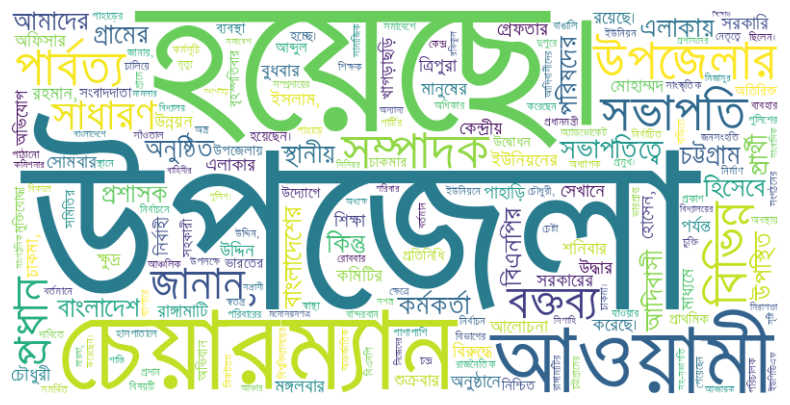

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Count word frequencies
words = text_without_stopwords.split()
word_frequencies = Counter(words)

# Generate word cloud from word frequencies
wordcloud = WordCloud(
    font_path='Siyamrupali.ttf',
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
